# Comparison of wine prices in regard to average country income

Comparison Data:
  country_code  avg_wine_price  avg_income  wine_price_percentage
0          ITA           1.487       35000               0.004249
1          CHE           1.650       85000               0.001941
2          FRA           2.315       40000               0.005788
3          DEU           0.600       45000               0.001333


/var/folders/2x/mg2r4sgx09d5rr4phpnvw4vm0000gn/T/ipykernel_23075/3263017912.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  wine_data = pd.read_sql(query, connection)


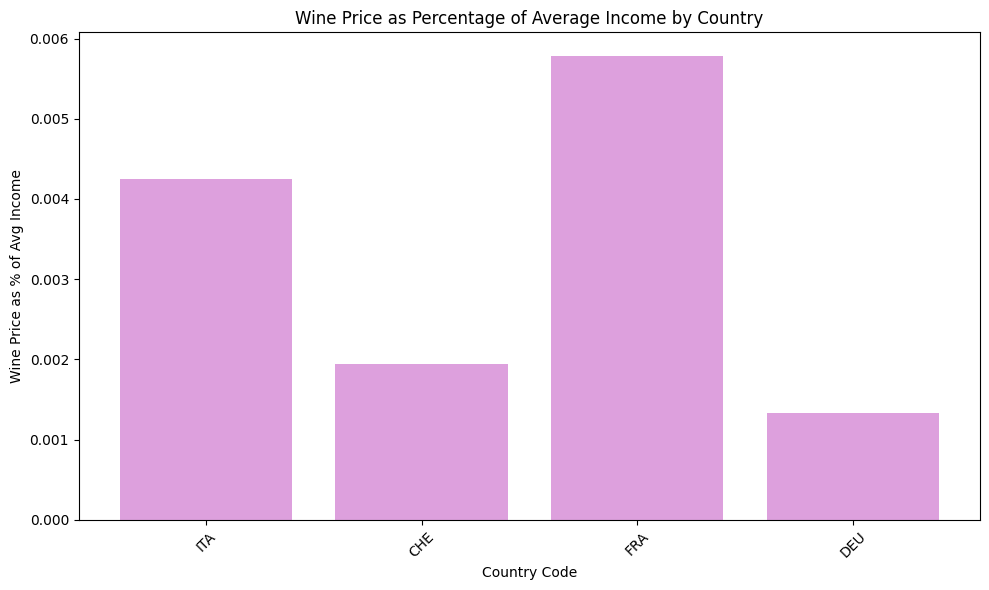

In [4]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

# Database connection
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="rootroot",
    database="wines"
)

# Query wine data from the database
query = """
SELECT country_code, AVG(price_per_10cl) AS avg_wine_price
FROM Products
JOIN Countries ON Products.country_id = Countries.country_id
GROUP BY country_code;
"""
wine_data = pd.read_sql(query, connection)

# Close the database connection
connection.close()

# Load the average income data from the CSV file
income_data = pd.read_csv('../data/raw/avg_income.csv')

# Ensure consistent column naming for merging
income_data.rename(columns={'country': 'country_code'}, inplace=True)

# Merge wine price data with income data on country_code
comparison_data = pd.merge(wine_data, income_data, on='country_code')

# Calculate wine price as a percentage of average income
comparison_data['wine_price_percentage'] = (
    (comparison_data['avg_wine_price'] / comparison_data['avg_income']) * 100
)

# Display the merged data
print("Comparison Data:")
print(comparison_data)

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(
    comparison_data['country_code'], 
    comparison_data['wine_price_percentage'], 
    color='plum'
)
plt.title('Wine Price as Percentage of Average Income by Country')
plt.xlabel('Country Code')
plt.ylabel('Wine Price as % of Avg Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
